<a href="https://colab.research.google.com/github/Shah-Zaib123/CS867-Assignment-3/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading a Kaggle Dataset in Colab Session

Following the steps below to download and use kaggle data within Google Colab:
1. Sign Up on Kaggle and move to account tab.
2. Scroll to API section and Click Expire API Token to remove previous tokens (if created before).
3. Click on Create New API Token - It will download kaggle.json file on your machine.
4. Go to your Google Colab project file and run the following commands:

In [2]:
!pip install --upgrade --ignore-installed kaggle


     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 153kB 17.0MB/s 
     |████████████████████████████████| 235kB 28.6MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 143kB 47.4MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 184kB 30.5MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=6417f156b4093bb4081ef89cf70f75d90ef3d7b4e06d6ef07971dfcb80d4e053
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=157c645a277377d718994c9504cae0934add2b6387a21d3829ab2d71884052a9
  Stored in directory: /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f

5. Import the "kaggle.json" downloaded above in step 3.

In [3]:
from google.colab import files
files.upload()
print("\nkaggle.json file uploaded successfully.......")

Saving kaggle.json to kaggle.json

kaggle.json file uploaded successfully.......


6. Make directory named kaggle and copy kaggle.json file there.

In [4]:
!mkdir ~/.kaggle #created at root folder in colab
!cp kaggle.json ~/.kaggle #copying

7. Change the permissions of the file.

**Note:** Permissions of 600 mean that the owner has full read and write access to the file, while no other user can access the file.)

In [5]:
!chmod 600 ~/.kaggle/kaggle.json
print("\n File permission chnaged to 600 successfully.......")


 File permission chnaged to 600 successfully.......


8. To download a specific Dataset (intel-image-classification):
- Go to a URL of a particular dataset(https://www.kaggle.com/puneet6060/intel-image-classification/version/2) and look for **Copy API command**

In [6]:
#downloading Intel Image Classification dataset
print("Downloading Intel Image Classification Kaggle dataset.......\n")
!kaggle datasets download -d puneet6060/intel-image-classification
print("\n Dataset downloaded successfully.......")


 94% 325M/346M [00:02<00:00, 174MB/s]
100% 346M/346M [00:02<00:00, 162MB/s]

 Dataset downloaded successfully.......


9. Unziping dataset in Colab session.

In [7]:
print("Unziping dataset in colab session started.......\n")
!unzip -q intel-image-classification.zip # -q for quiet 
print("\n Dataset successfully unziped in colab session.......")

Unziping dataset in colab session started.......


 Dataset successfully unziped in colab session.......


10. Mounting to google drive and Replacing the old seg_pred folder with new labeled data of seg_pred folder

In [8]:
# Mounting to google drive.....
from google.colab import drive
drive.mount('/content/drive')
print("\n Mounted to google drive successfully.......")

#deleting the old seg_pred and unziping new seg_pred.....
!rm -rf seg_pred
!unzip -q /content/drive/MyDrive/Test_data.zip # -q for quiet 
print("\n Replacing the old seg_pred folder with new labeled data of seg_pred folder successfully ......")

Mounted at /content/drive

 Mounted to google drive successfully.......

 Replacing the old seg_pred folder with new labeled data of seg_pred folder successfully ......


### Performing Transfer Learning for Image Classification <br>


I used the VGG16 pretrained model and exclude the last classification layer.I added new layers at the end like Conv and Pooling layers or only a FC classification layer according to our data and train. I will only use a classification layer and see how it performs without training and with training for few epochs on the **Base_Model**(Model without data_Aurgumentation) and on the model after applying the data_aurgumentation.



1. Importing necessary Libraries....

In [9]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import backend as K
from scipy import misc,ndimage
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

2. Load VGG16 model without classification layers...

In [10]:
model = VGG16(include_top=False, input_shape=(150, 150, 3))       # load VGG16 model without classification layers

58892288/58889256 [==============================] - 1s 0us/step


3. Adding new classification layers....

In [11]:
# Adding new classification layers
flat1 = Flatten()(model.layers[-1].output) # flatten last layer
class1 = Dense(1024, activation='relu')(flat1) # add FC layer on previous layer
output = Dense(6, activation='softmax')(class1) # add softmax layer

4. Defining the Model...

In [12]:
# define the new model
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

5. Defining the path to dataset folders...

In [13]:
train_path = '/content/seg_train/seg_train/'
valid_path = '/content/seg_test/seg_test/'
test_path = '/content/seg_pred/seg_pred/'

6. Loading the training and Validition data without using Data_Aurgumentation for Base_Model...

In [14]:
#loading data without data_aurgumentation
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(150,150),
    batch_size=32,
    color_mode="rgb",
    label_mode='categorical' 
    )

valid_ds =tf.keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(150,150),
    batch_size=32,
    color_mode="rgb",
    shuffle=False,
    label_mode='categorical'
    )

test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(150,150),
    batch_size=32,
    color_mode="rgb",
    shuffle=False,
    label_mode='categorical'
    )


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 7301 files belonging to 6 classes.


7. Compiling the model....

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

8. Training the model without using the Data_Aurgumentation...

In [16]:
#training model without data_aurgumentation
base_model= model.fit(train_ds, 
              epochs=5, 
              batch_size=32,
              validation_data=valid_ds)

Epoch 1/5
439/439 [==============================] - 115s 240ms/step - loss: 1.7147 - accuracy: 0.3764 - val_loss: 0.2758 - val_accuracy: 0.6037
Epoch 2/5
439/439 [==============================] - 106s 241ms/step - loss: 0.2765 - accuracy: 0.6077 - val_loss: 0.2325 - val_accuracy: 0.6960
Epoch 3/5
439/439 [==============================] - 106s 241ms/step - loss: 0.2204 - accuracy: 0.7122 - val_loss: 0.2113 - val_accuracy: 0.7193
Epoch 4/5
439/439 [==============================] - 106s 240ms/step - loss: 0.1926 - accuracy: 0.7608 - val_loss: 0.1719 - val_accuracy: 0.7873
Epoch 5/5
439/439 [==============================] - 106s 241ms/step - loss: 0.1622 - accuracy: 0.8064 - val_loss: 0.1533 - val_accuracy: 0.8200


9. Displaying the Qualitative Results of base_model.....

<Figure size 432x288 with 0 Axes>

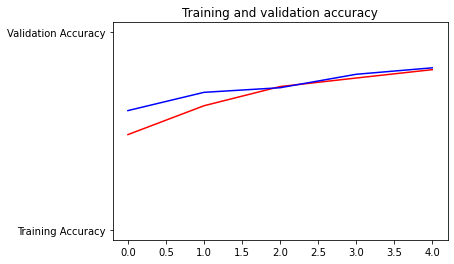

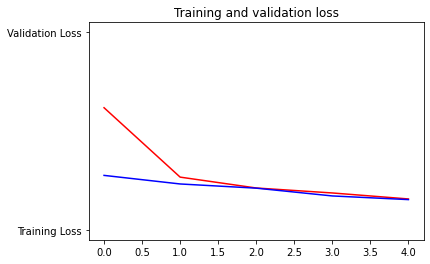

<Figure size 432x288 with 0 Axes>

In [17]:

# #-----------------------------------------------------------
# # Retrieve a list of list results on training and test data for base_model
# # sets for each training epoch
# #-----------------------------------------------------------
acc=base_model.history['accuracy']
val_acc=base_model.history['val_accuracy']
loss=base_model.history['loss']
val_loss=base_model.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# # Plot training and validation accuracy per epoch for base_model
# #------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# # Plot training and validation loss per epoch for base_model
# #------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.figure()




10. Evaluting the Test Loss and Accuracy for base_Model.....

In [18]:
score = model.evaluate(valid_ds, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])


94/94 [==============================] - 7s 79ms/step - loss: 0.1533 - accuracy: 0.8200
Test Loss =  0.1533454954624176
Test Accuracy =  0.8199999928474426


11. Loading the training, Validition and Test data  using Data_Aurgumentation.....

In [20]:
#loading data with data_aurgumentation

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True,brightness_range = (0.5, 1.5), zoom_range=0.2
        )
        
                                   

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                 train_path,
                                                 target_size = (150, 150),
                                                 color_mode="rgb",
                                                 batch_size = 32,
                                                 class_mode = 'categorical' 
                                                 )


validation_generator = valid_datagen.flow_from_directory(valid_path ,
                                            target_size = (150, 150),
                                            shuffle=False,
                                            batch_size = 32,
                                            color_mode="rgb",
                                            class_mode = 'categorical' 
                                            )

test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (150, 150),
                                            color_mode="rgb",
                                            batch_size=32,
                                            class_mode = 'categorical',
                                            shuffle=False,
                                            )



Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 6 classes.


11. Compiling the model....

In [21]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

12. Training the model after using the Data_Aurgumentation...

In [22]:
# fit the model
 #training model without data aurgumentation
data_argum_model= model.fit(
              train_generator, 
              epochs=5, 
              batch_size=32,
              validation_data=validation_generator)


Epoch 1/5
439/439 [==============================] - 127s 287ms/step - loss: 0.9193 - accuracy: 0.6710 - val_loss: 0.5155 - val_accuracy: 0.8170
Epoch 2/5
439/439 [==============================] - 123s 281ms/step - loss: 0.6178 - accuracy: 0.7756 - val_loss: 0.4485 - val_accuracy: 0.8417
Epoch 3/5
439/439 [==============================] - 123s 279ms/step - loss: 0.5338 - accuracy: 0.8150 - val_loss: 0.4995 - val_accuracy: 0.8213
Epoch 4/5
439/439 [==============================] - 124s 282ms/step - loss: 0.5021 - accuracy: 0.8169 - val_loss: 0.5172 - val_accuracy: 0.8197
Epoch 5/5
439/439 [==============================] - 123s 279ms/step - loss: 0.5074 - accuracy: 0.8233 - val_loss: 0.4585 - val_accuracy: 0.8403


13. Saving the model weights.....

In [23]:
model.save('data_argum_model.h5')

14. Displaying the Qualitative Results of model after data_aurgumentation.....

<Figure size 432x288 with 0 Axes>

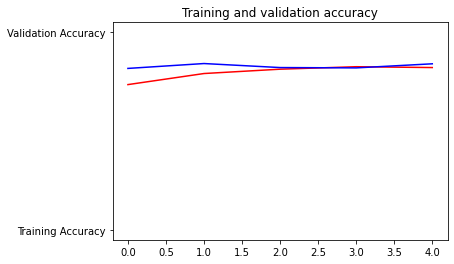

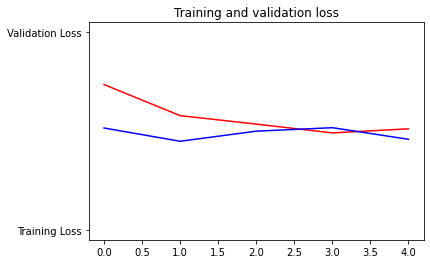

<Figure size 432x288 with 0 Axes>

In [24]:

# #-----------------------------------------------------------
# # Retrieve a list of list results on training and test data for data_argum_model
# # sets for each training epoch
# #-----------------------------------------------------------
acc=data_argum_model.history['accuracy']
val_acc=data_argum_model.history['val_accuracy']
loss=data_argum_model.history['loss']
val_loss=data_argum_model.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# # Plot training and validation accuracy per epoch for data_argum_model
# #------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# # Plot training and validation loss per epoch for data_argum_model
# #------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.figure()




15. Evaluting the Test Loss and Accuracy for data_argumented_Model.....

In [25]:
score = model.evaluate(validation_generator, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])


94/94 [==============================] - 6s 65ms/step - loss: 0.4585 - accuracy: 0.8403
Test Loss =  0.4584806263446808
Test Accuracy =  0.8403333425521851


16. Confusion Matrix....


In [26]:

from sklearn.metrics import  confusion_matrix
#Confution Matrix

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[1019    3    7    3    2  110]
 [  12 1106    4    1    1   42]
 [  18    8 1125  133   33   13]
 [  32    8  200  987   62    8]
 [  64    2  105   64  860   33]
 [ 150   12   11    1    5 1057]]
